Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
Epoch 0 - loss: 150.3333282470703
Epoch 1 - loss: 6.120000839233398
Epoch 2 - loss: 36.42483139038086
Epoch 3 - loss: 18.104557037353516
Epoch 4 - loss: 6.065776824951172
Epoch 5 - loss: 10.368836402893066
Epoch 6 - loss: 6.232229709625244
Epoch 7 - loss: 5.852260589599609
Epoch 8 - loss: 6.088119983673096
Epoch 9 - loss: 5.494866847991943
Epoch 10 - loss: 5.574592590332031
Epoch 290 - loss: 5.47619104385376
Epoch 291 - loss: 5.47619104385376
Epoch 292 - loss: 5.476190567016602
Epoch 293 - loss: 5.47619104385376
Epoch 294 - loss: 5.47619104385376
Epoch 295 - loss: 5.47619104385376
Epoch 296 - loss: 5.476190567016602
Epoch 297 - loss: 5.47619104385376
Epoch 298 - loss: 5.47619104385376
Epoch 299 - loss: 5.47619104385376
when x = tensor([1., 3.]), y = tensor([3.5714], grad_fn=<SqueezeBackward4>)
when x = tensor([2., 6.]), y = tensor([7.1429], grad_fn=<Squeeze

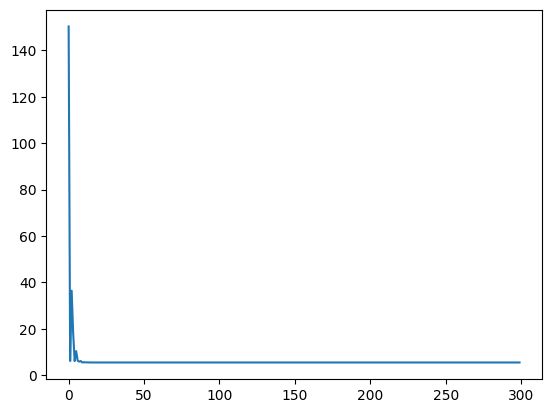

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

hist = []

############## Batch GD based update ##############       

num_epochs = 300
verbosity = 0
for epoch in range(num_epochs):   
    optimizer.zero_grad()
    outputs = net(data)
    loss = criterion(outputs, target)
    loss.backward()
    hist.append(loss.detach())
    optimizer.step()
    if verbosity == 0:
        if epoch <= 10 or epoch >= (num_epochs - 10):
            print("Epoch {} - loss: {}".format(epoch, loss))
    else:
        print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")

Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
tensor([1., 3.])
tensor([2., 6.])
tensor([3., 9.])
Epoch 0 - loss: 48.16359329223633
Epoch 1 - loss: 1.0173128843307495
Epoch 2 - loss: 88.83402252197266
Epoch 3 - loss: 1.685847282409668
Epoch 4 - loss: 89.11278533935547
Epoch 5 - loss: 1.635256290435791
Epoch 6 - loss: 88.66230010986328
Epoch 7 - loss: 1.5735151767730713
Epoch 8 - loss: 88.20365142822266
Epoch 9 - loss: 1.5130443572998047
Epoch 10 - loss: 87.74807739257812
Epoch 290 - loss: 47.09926223754883
Epoch 291 - loss: 1.671721339225769
Epoch 292 - loss: 46.92462158203125
Epoch 293 - loss: 1.7047362327575684
Epoch 294 - loss: 46.75111389160156
Epoch 295 - loss: 1.73792564868927
Epoch 296 - loss: 46.57870864868164
Epoch 297 - loss: 1.7712750434875488
Epoch 298 - loss: 46.407413482666016
Epoch 299 - loss: 1.804795265197754
when x = tensor([1., 3.]), y = tensor([3.1382], grad_fn=<SqueezeBackward4>)
wh

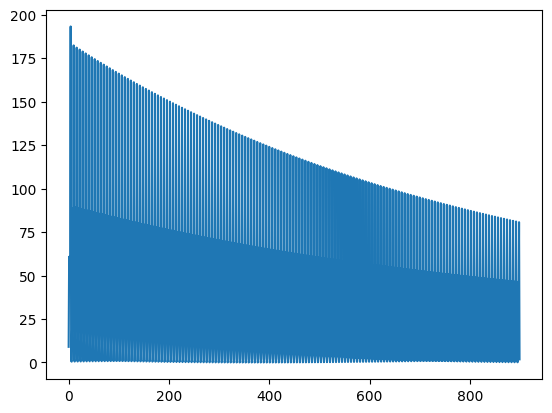

In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

for i in data:
    print(i)

hist = []

############## SGD based update ##############       

num_epochs = 300
verbosity = 0
for epoch in range(num_epochs):
    for i in range(len(data)):
        X = data[i]
        Y = target[i]
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        hist.append(loss.detach())
        optimizer.step()
    if verbosity == 0:
        if epoch <= 10 or epoch >= (num_epochs - 10):
            print("Epoch {} - loss: {}".format(epoch, loss))
    else:
        print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")